# Experiment 2.6
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.6'

In [2]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [3]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.6_metrics.csv", index_col=0)

In [4]:
hpo_table.sum(axis=0)

learning_rate         0.198000
batch_size         7680.000000
e_layers            440.000000
d_layers            400.000000
d_model           23808.000000
seq_len           25920.000000
pred_len          40320.000000
MSE                   9.001479
MAE                  24.324956
Epochs              748.000000
Time[min]          1546.000000
Params[Mio.]        818.880000
Max_mem[MB]      926129.080000
dtype: float64

In [5]:
hpo_table.groupby("Params[Mio.]").mean()

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Max_mem[MB]
Params[Mio.],,,,,,,,,,,,
0.04,0.00165,64.0,2.0,1.0,32.0,216.0,336.0,0.090945,0.225740,7.625,3.750,1305.905
0.09,0.00165,64.0,3.0,3.0,32.0,216.0,336.0,0.078103,0.207688,8.000,8.125,2991.540
0.17,0.00165,64.0,2.0,1.0,64.0,216.0,336.0,0.079711,0.208134,8.500,5.750,2552.770
0.18,0.00165,64.0,6.0,6.0,32.0,216.0,336.0,0.079908,0.210137,7.375,14.375,5764.980
0.35,0.00165,64.0,3.0,3.0,64.0,216.0,336.0,0.071658,0.198918,6.625,10.250,5896.600
0.66,0.00165,64.0,2.0,1.0,128.0,216.0,336.0,0.076935,0.205726,5.750,4.125,2776.225
0.70,0.00165,64.0,6.0,6.0,64.0,216.0,336.0,0.071893,0.198909,6.750,19.375,11403.680
1.39,0.00165,64.0,3.0,3.0,128.0,216.0,336.0,0.069554,0.194900,5.750,9.750,6499.145
2.64,0.00165,64.0,2.0,1.0,256.0,216.0,336.0,0.071743,0.197699,6.250,5.750,3374.960


In [6]:
hpo_table[hpo_table["MSE"]<0.08].groupby("batch_size").mean()

,learning_rate,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
batch_size,,,,,,,,,,,,
64,0.001728,3.709677,3.419355,211.268817,222.451613,336.0,0.071475,0.197724,5.870968,13.333333,6.467527,8232.591398


In [7]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
57,0.0005,64,6,6,256,336,336,0.056870,0.179203,7,41,11.07,21337.84
101,0.0050,64,3,3,32,336,336,0.061062,0.183494,5,6,0.09,4268.13
111,0.0050,64,6,6,32,336,336,0.062267,0.185749,5,12,0.18,8267.32
85,0.0010,64,6,6,128,336,336,0.063344,0.186068,5,22,2.78,17991.39
73,0.0010,64,3,3,64,336,336,0.063697,0.187176,6,12,0.35,8462.23
74,0.0010,64,3,3,128,96,336,0.063949,0.185450,5,5,1.39,3785.98
28,0.0001,64,6,6,512,96,336,0.064966,0.189840,6,30,44.15,13933.20
43,0.0005,64,3,3,64,336,336,0.065025,0.188544,6,12,0.35,8462.23
16,0.0001,64,3,3,256,96,336,0.065481,0.187054,5,7,5.54,4876.06
56,0.0005,64,6,6,256,96,336,0.065574,0.190548,5,15,11.07,9436.43


In [8]:
sorted_df.tail(10)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
2,0.0001,64,2,1,64,96,336,0.086812,0.217883,16,8,0.17,1352.37
100,0.0050,64,3,3,32,96,336,0.086930,0.219282,5,4,0.09,1714.95
92,0.0050,64,2,1,64,96,336,0.087868,0.219836,4,2,0.17,1352.37
64,0.0010,64,2,1,128,96,336,0.088412,0.228734,5,2,0.66,1510.56
11,0.0001,64,3,3,32,336,336,0.095029,0.231471,9,12,0.09,4268.13
91,0.0050,64,2,1,32,336,336,0.095225,0.229496,5,3,0.04,1895.16
10,0.0001,64,3,3,32,96,336,0.095241,0.231447,16,13,0.09,1714.95
1,0.0001,64,2,1,32,336,336,0.098133,0.236292,14,9,0.04,1895.16
0,0.0001,64,2,1,32,96,336,0.101197,0.239535,13,5,0.04,716.65
90,0.0050,64,2,1,32,96,336,0.102414,0.240727,4,1,0.04,716.65


In [9]:
sorted_df[sorted_df["e_layers"]==6].head(50)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
57,0.0005,64,6,6,256,336,336,0.056870,0.179203,7,41,11.07,21337.84
111,0.0050,64,6,6,32,336,336,0.062267,0.185749,5,12,0.18,8267.32
85,0.0010,64,6,6,128,336,336,0.063344,0.186068,5,22,2.78,17991.39
28,0.0001,64,6,6,512,96,336,0.064966,0.189840,6,30,44.15,13933.20
56,0.0005,64,6,6,256,96,336,0.065574,0.190548,5,15,11.07,9436.43
84,0.0010,64,6,6,128,96,336,0.065676,0.190213,5,10,2.78,7340.84
116,0.0050,64,6,6,256,96,336,0.065726,0.189951,4,12,11.07,9436.43
29,0.0001,64,6,6,512,336,336,0.066141,0.190821,7,65,44.15,28717.81
115,0.0050,64,6,6,128,336,336,0.067125,0.190648,4,18,2.78,17991.39
118,0.0050,64,6,6,512,96,336,0.067395,0.191038,4,19,44.15,13933.20


In [10]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(4)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models

,Lr,D. model,Enc. layers,Params[Mio.],Seq. len.,Epochs,MSE
Mean Top10,0.0015,172,4,7.70,240,5,0.0632
Std Top10,0.0019,150,1,13.51,123,0,0.0027
90,0.0050,32,2,0.04,96,4,0.1024
57,0.0005,256,6,11.07,336,7,0.0569
101,0.0050,32,3,0.09,336,5,0.0611
111,0.0050,32,6,0.18,336,5,0.0623


In [11]:
overview_models.to_latex("./../../results/figures_latex/hpo_transformer_336_overview.tex", escape=False, )

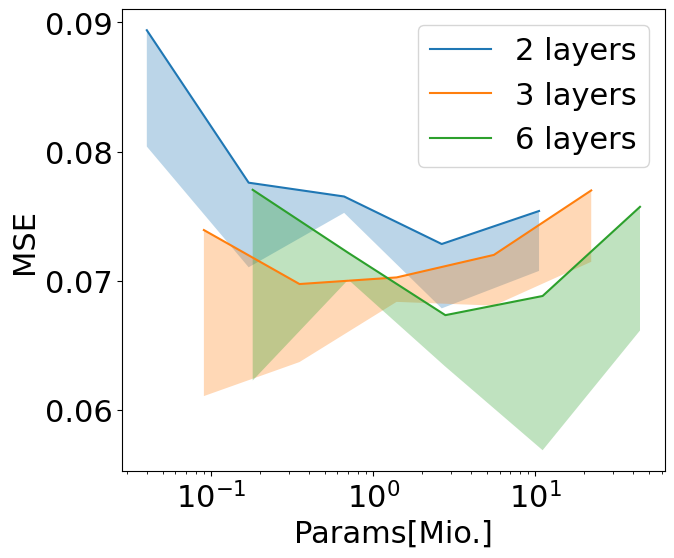

In [12]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

mc_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).mean()
mc_min_table = hpo_table[hpo_table["seq_len"]==336].groupby(["e_layers", "Params[Mio.]"]).min()
#print(mc_table)
#print(mc_table.xs(2, level="e_layers").index)

#Plot MSE over Params. Each e_layer has a different color
fig, ax = plt.subplots(1,1,figsize=(7, 6))
for i in [2,3,6]:
    ax.plot(mc_table.xs(i, level="e_layers").index, mc_table.xs(i, level="e_layers")["MSE"], label=f"{i} layers")
    ax.fill_between(mc_table.xs(i, level="e_layers").index, mc_min_table.xs(i, level="e_layers")["MSE"], mc_table.xs(i, level="e_layers")["MSE"], alpha=0.3)

ax.set_xlabel("Params[Mio.]")
ax.set_ylabel("MSE")
ax.legend(loc="upper right")
ax.set_xscale("log")
plt.show()

In [13]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.056869801133871

## Learning rate vs MSE

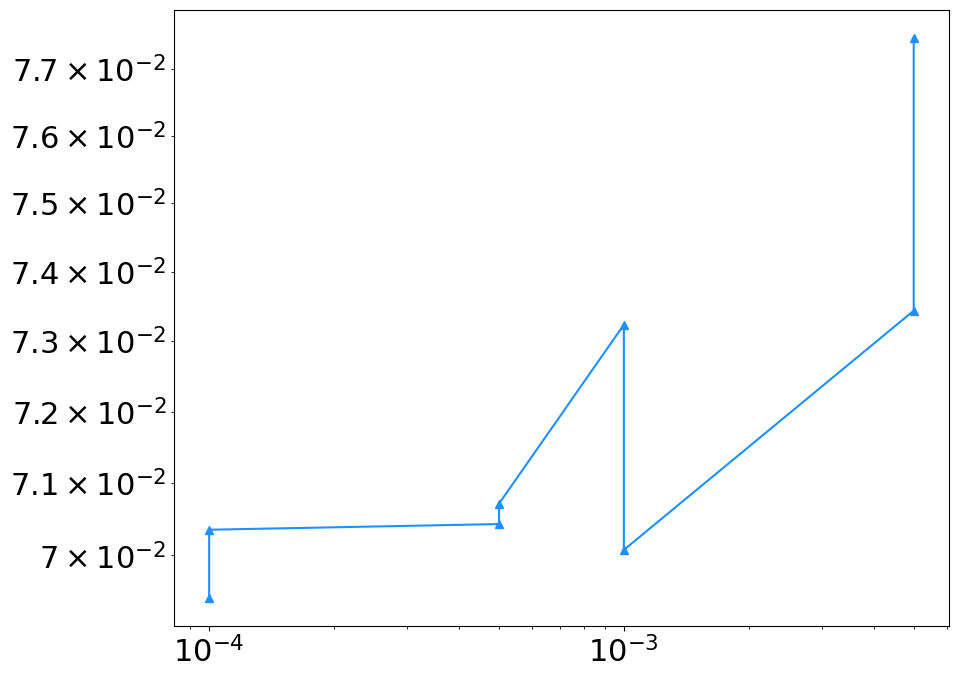

In [14]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.0: 'o', 0.7: '^', 1.6: 's', 10.5: 'h'}
batch_sizes = [32, 64, 128]
model_sizes = [10.5, 1.6, 0.7, 0.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")
ax.set_yscale("log")



## Params[Mio.] vs MSE

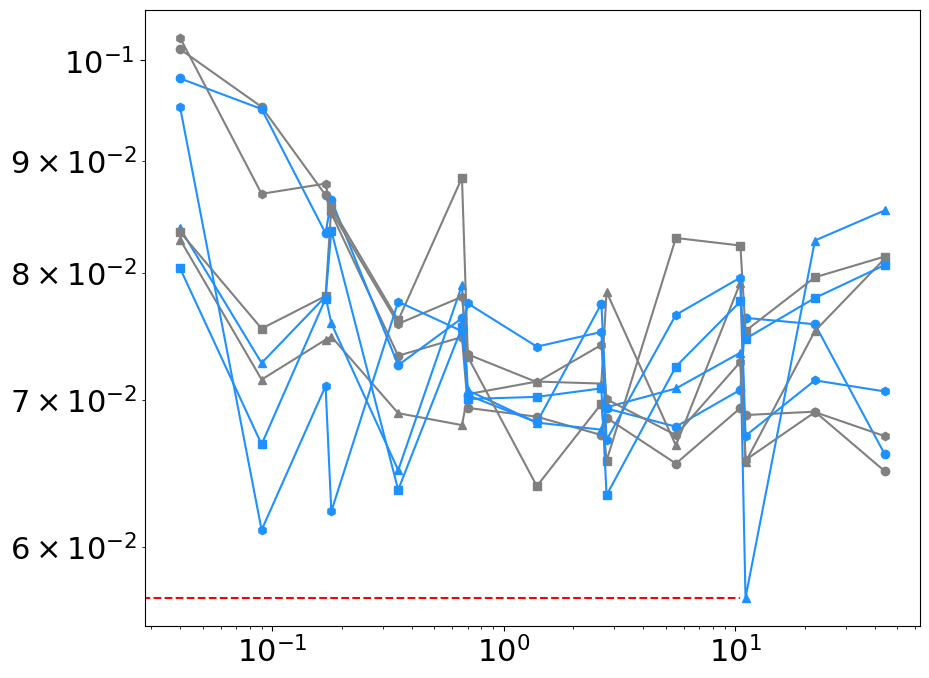

In [15]:
colors = {96: "grey", 336: "dodgerblue", 128: "darkblue"}
markers = {0.0001: 'o', 0.0005: '^', 0.001: 's', 0.005: 'h'}
seq_lens = [96, 336]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001, 0.005]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for sl in seq_lens:
        hpo_table_subset = hpo_table[(hpo_table["seq_len"] == sl) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[sl], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)
ax.set_xscale("log")
#ax.set_yscale("log")



In [16]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
61,0.0010,64,2,1,32,336,336,0.080386,0.211801,5,3,0.04,1895.16
30,0.0005,64,2,1,32,96,336,0.082856,0.213905,9,4,0.04,716.65
60,0.0010,64,2,1,32,96,336,0.083518,0.217497,6,2,0.04,716.65
31,0.0005,64,2,1,32,336,336,0.083833,0.216671,5,3,0.04,1895.16
91,0.0050,64,2,1,32,336,336,0.095225,0.229496,5,3,0.04,1895.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.0050,64,6,6,512,336,336,0.070637,0.194466,4,37,44.15,28717.81
89,0.0010,64,6,6,512,336,336,0.080663,0.207854,4,37,44.15,28717.81
58,0.0005,64,6,6,512,96,336,0.081205,0.209914,4,19,44.15,13933.20
88,0.0010,64,6,6,512,96,336,0.081384,0.213124,4,19,44.15,13933.20


In [17]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(120, 7)


In [18]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(7, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    #zs[:, -2][zs[:, -2] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=22)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-3].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=22)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="16%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


In [19]:
average_model = sorted_df.iloc[0:10].describe().iloc[1:3]
best_model = sorted_df.iloc[0:3]
worst_model = sorted_df.iloc[-1:]

overview_models = pd.concat([average_model, worst_model, best_model], axis=0)

overview_models.rename(index={"mean":"Mean Top10", "std":"Std Top10", 45: "Top1 model",  0: "Worst model"}, inplace=True)
overview_models.drop(columns=["MAE", "batch_size", "d_layers", "Time[min]", "Max_mem[MB]", "pred_len"], inplace=True)
overview_models.rename(columns={"learning_rate": "Lr", "e_layers": "Enc. layers", "d_model": "D. model", "seq_len": "Seq. len."}, inplace=True)
overview_models = overview_models.sort_index(axis=1)
overview_models = overview_models.round(4)
mse_column, lr_column, epoch_column = overview_models.pop("MSE"), overview_models.pop("Lr"), overview_models.pop("Epochs")
overview_models.insert(4, "Epochs", epoch_column)
overview_models= overview_models.round(2)

overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]] = overview_models[["D. model", "Enc. layers", "Seq. len.", "Epochs"]].astype(int)

overview_models.insert(0, "Lr", lr_column)
overview_models.insert(6, "MSE", mse_column)
overview_models


,Lr,D. model,Enc. layers,Params[Mio.],Seq. len.,Epochs,MSE
Mean Top10,0.0015,172,4,7.70,240,5,0.0632
Std Top10,0.0019,150,1,13.51,123,0,0.0027
90,0.0050,32,2,0.04,96,4,0.1024
57,0.0005,256,6,11.07,336,7,0.0569
101,0.0050,32,3,0.09,336,5,0.0611
111,0.0050,32,6,0.18,336,5,0.0623


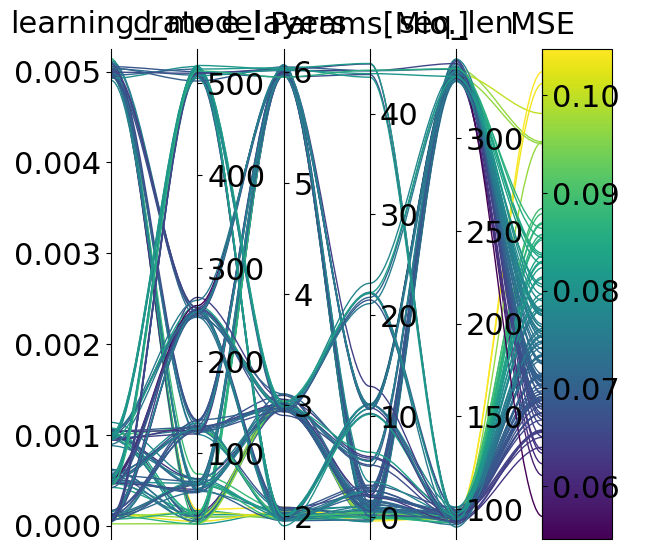

In [20]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

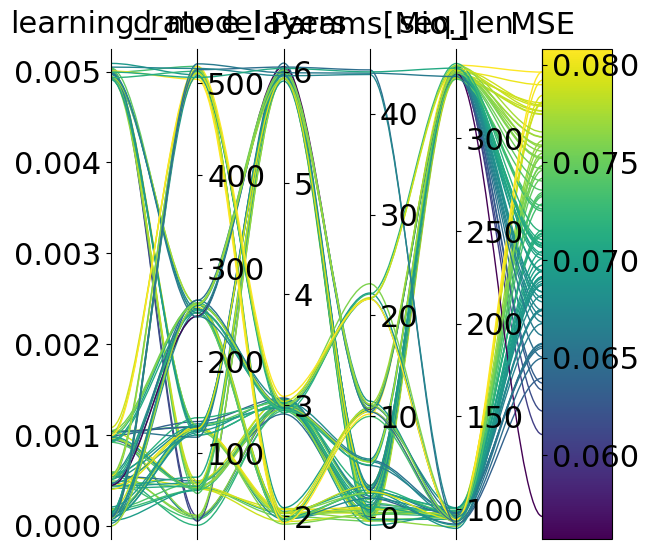

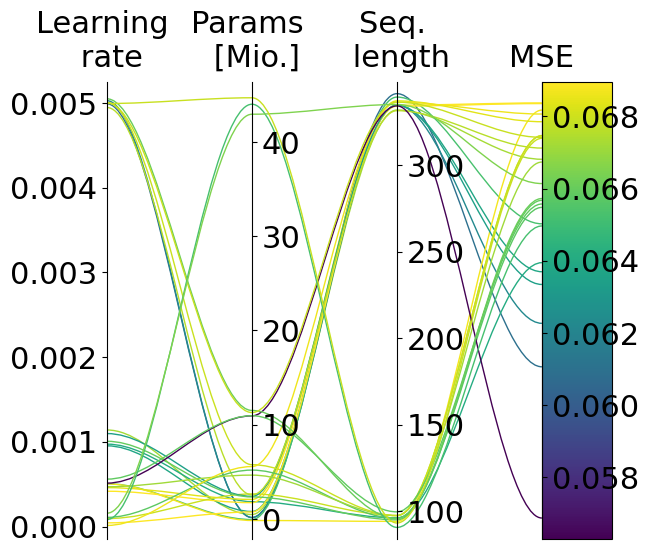

In [21]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "Params[Mio.]", "seq_len", "MSE"], threshold=0.0684, ynames=["Learning \n rate", "Params \n [Mio.]", "Seq. \n length", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

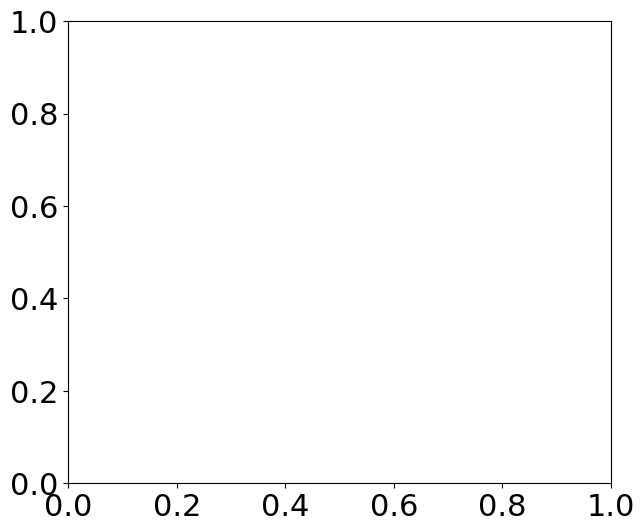

In [22]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_46686/1516025527.py:38: RuntimeWarning: invalid value encountered in divide
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_46686/1516025527.py:52: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymins[i], ymaxs[i])


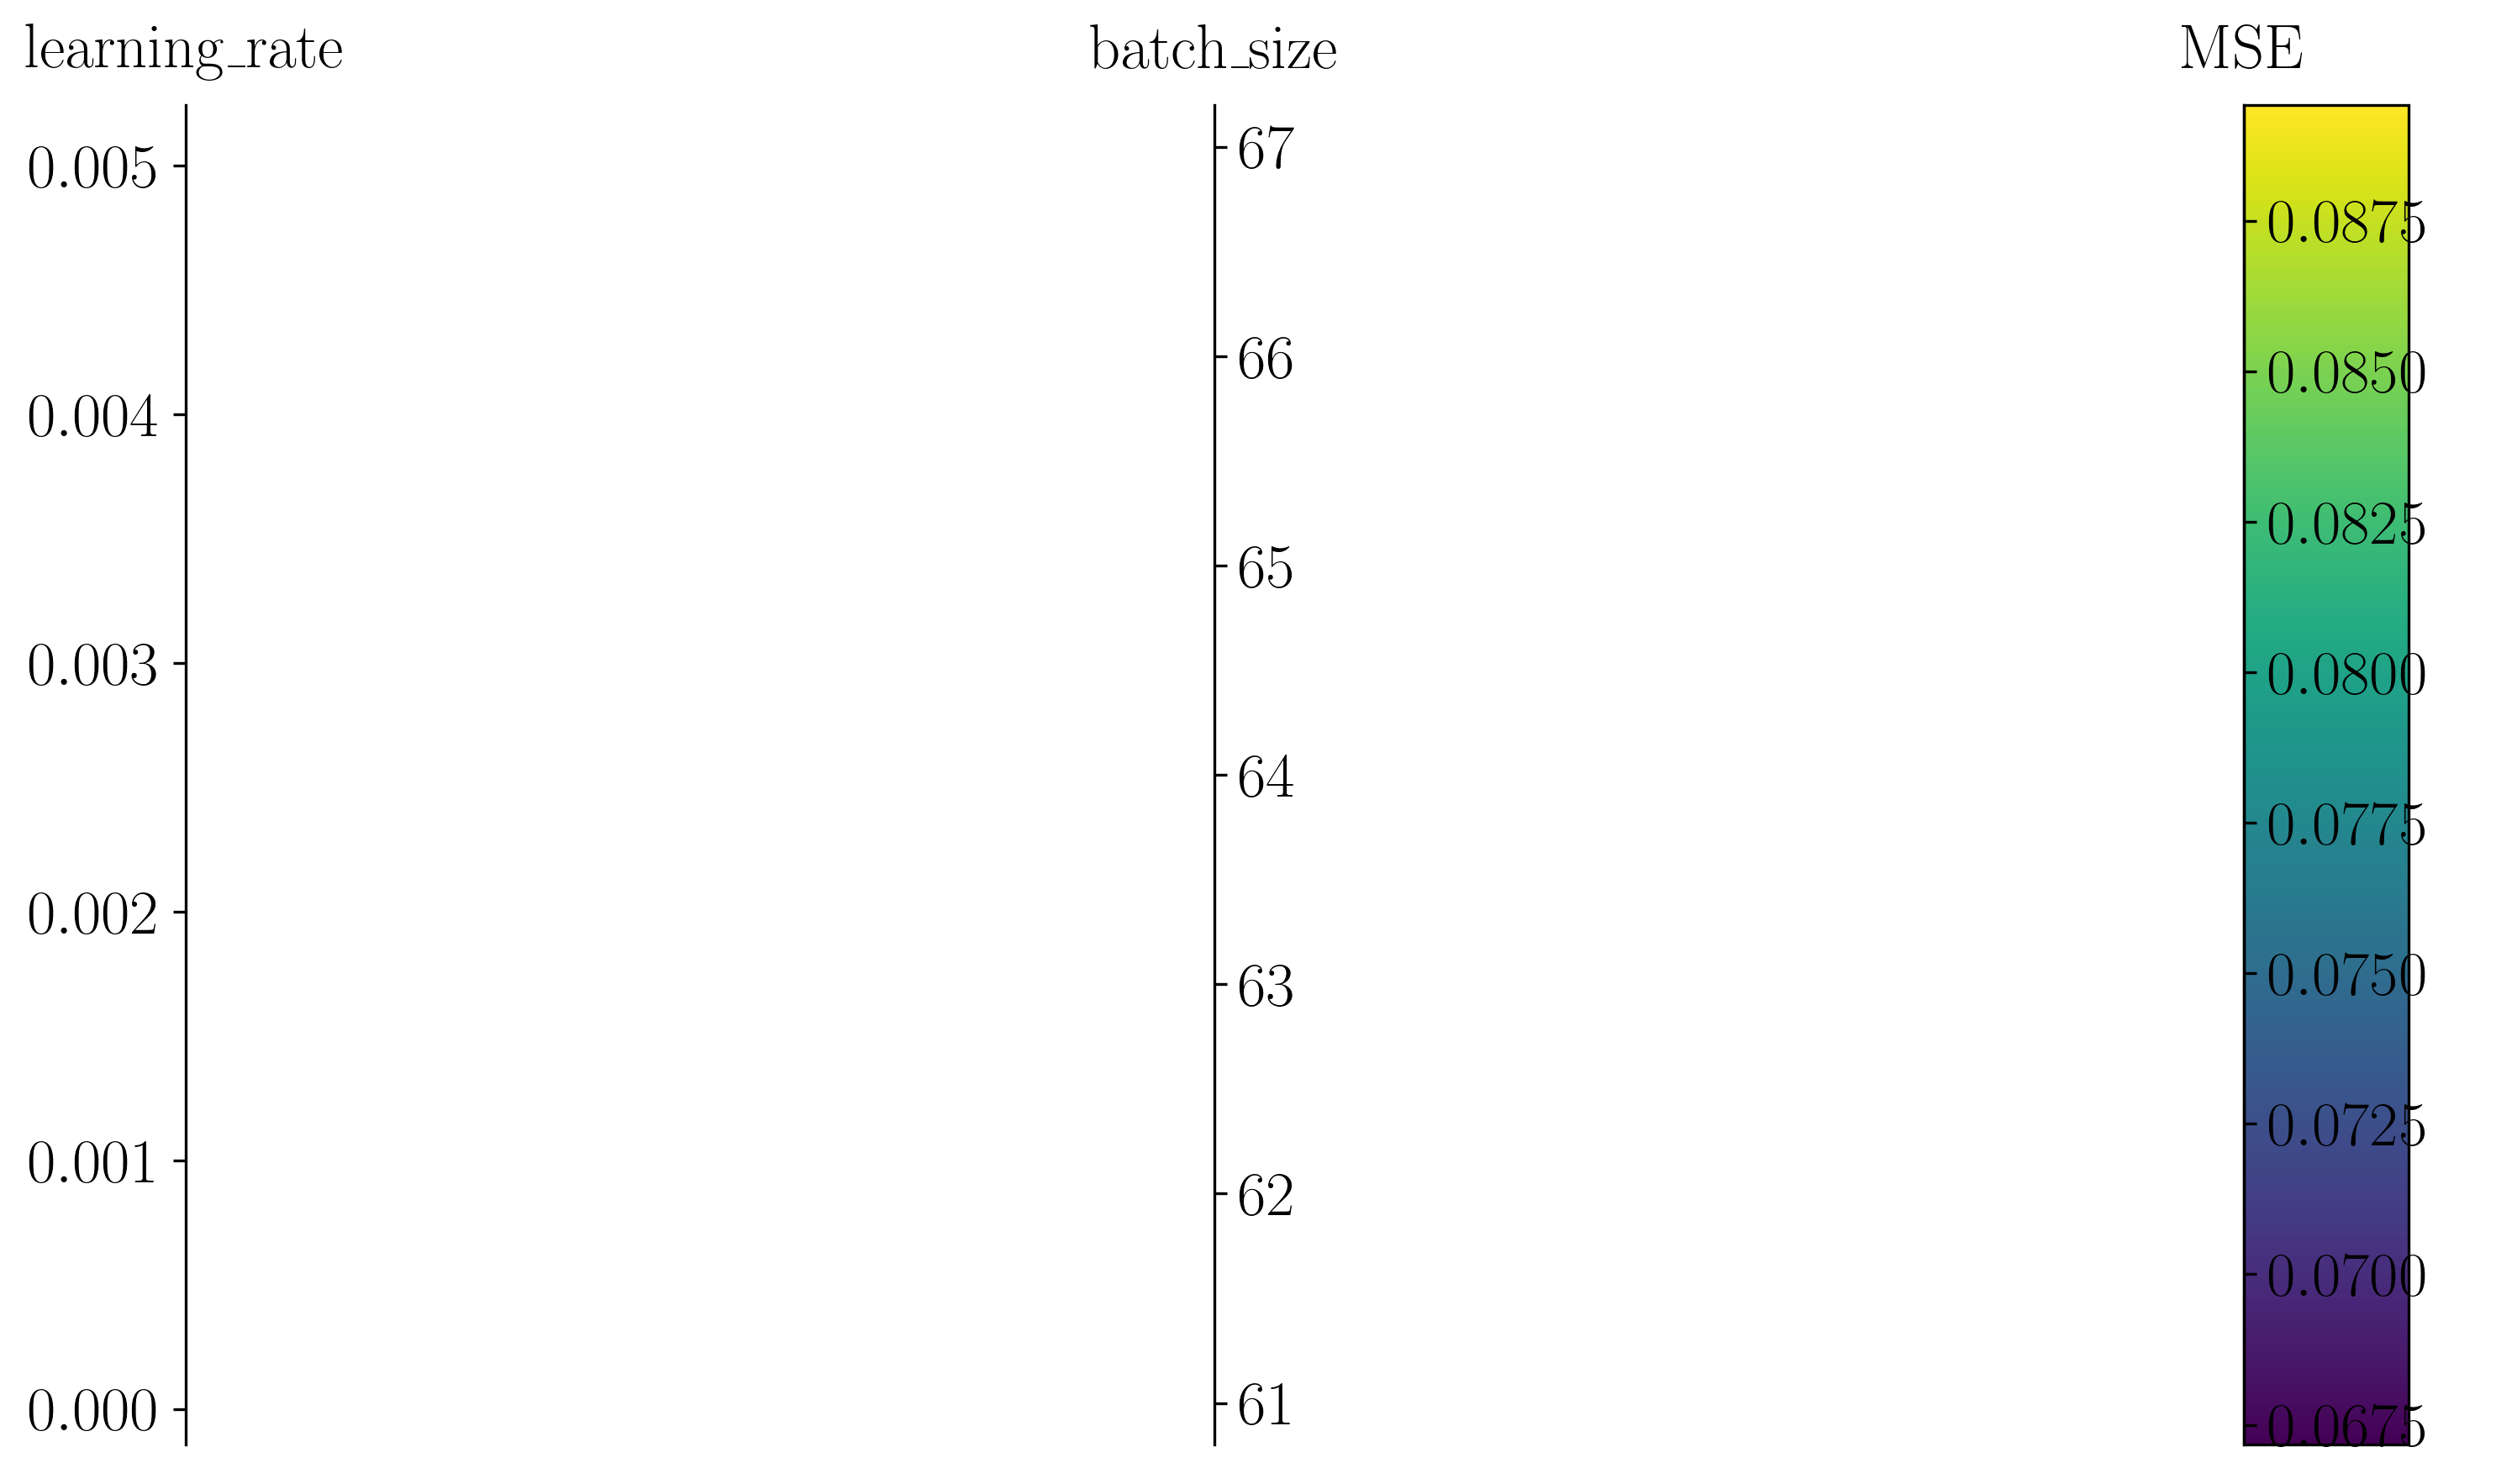

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

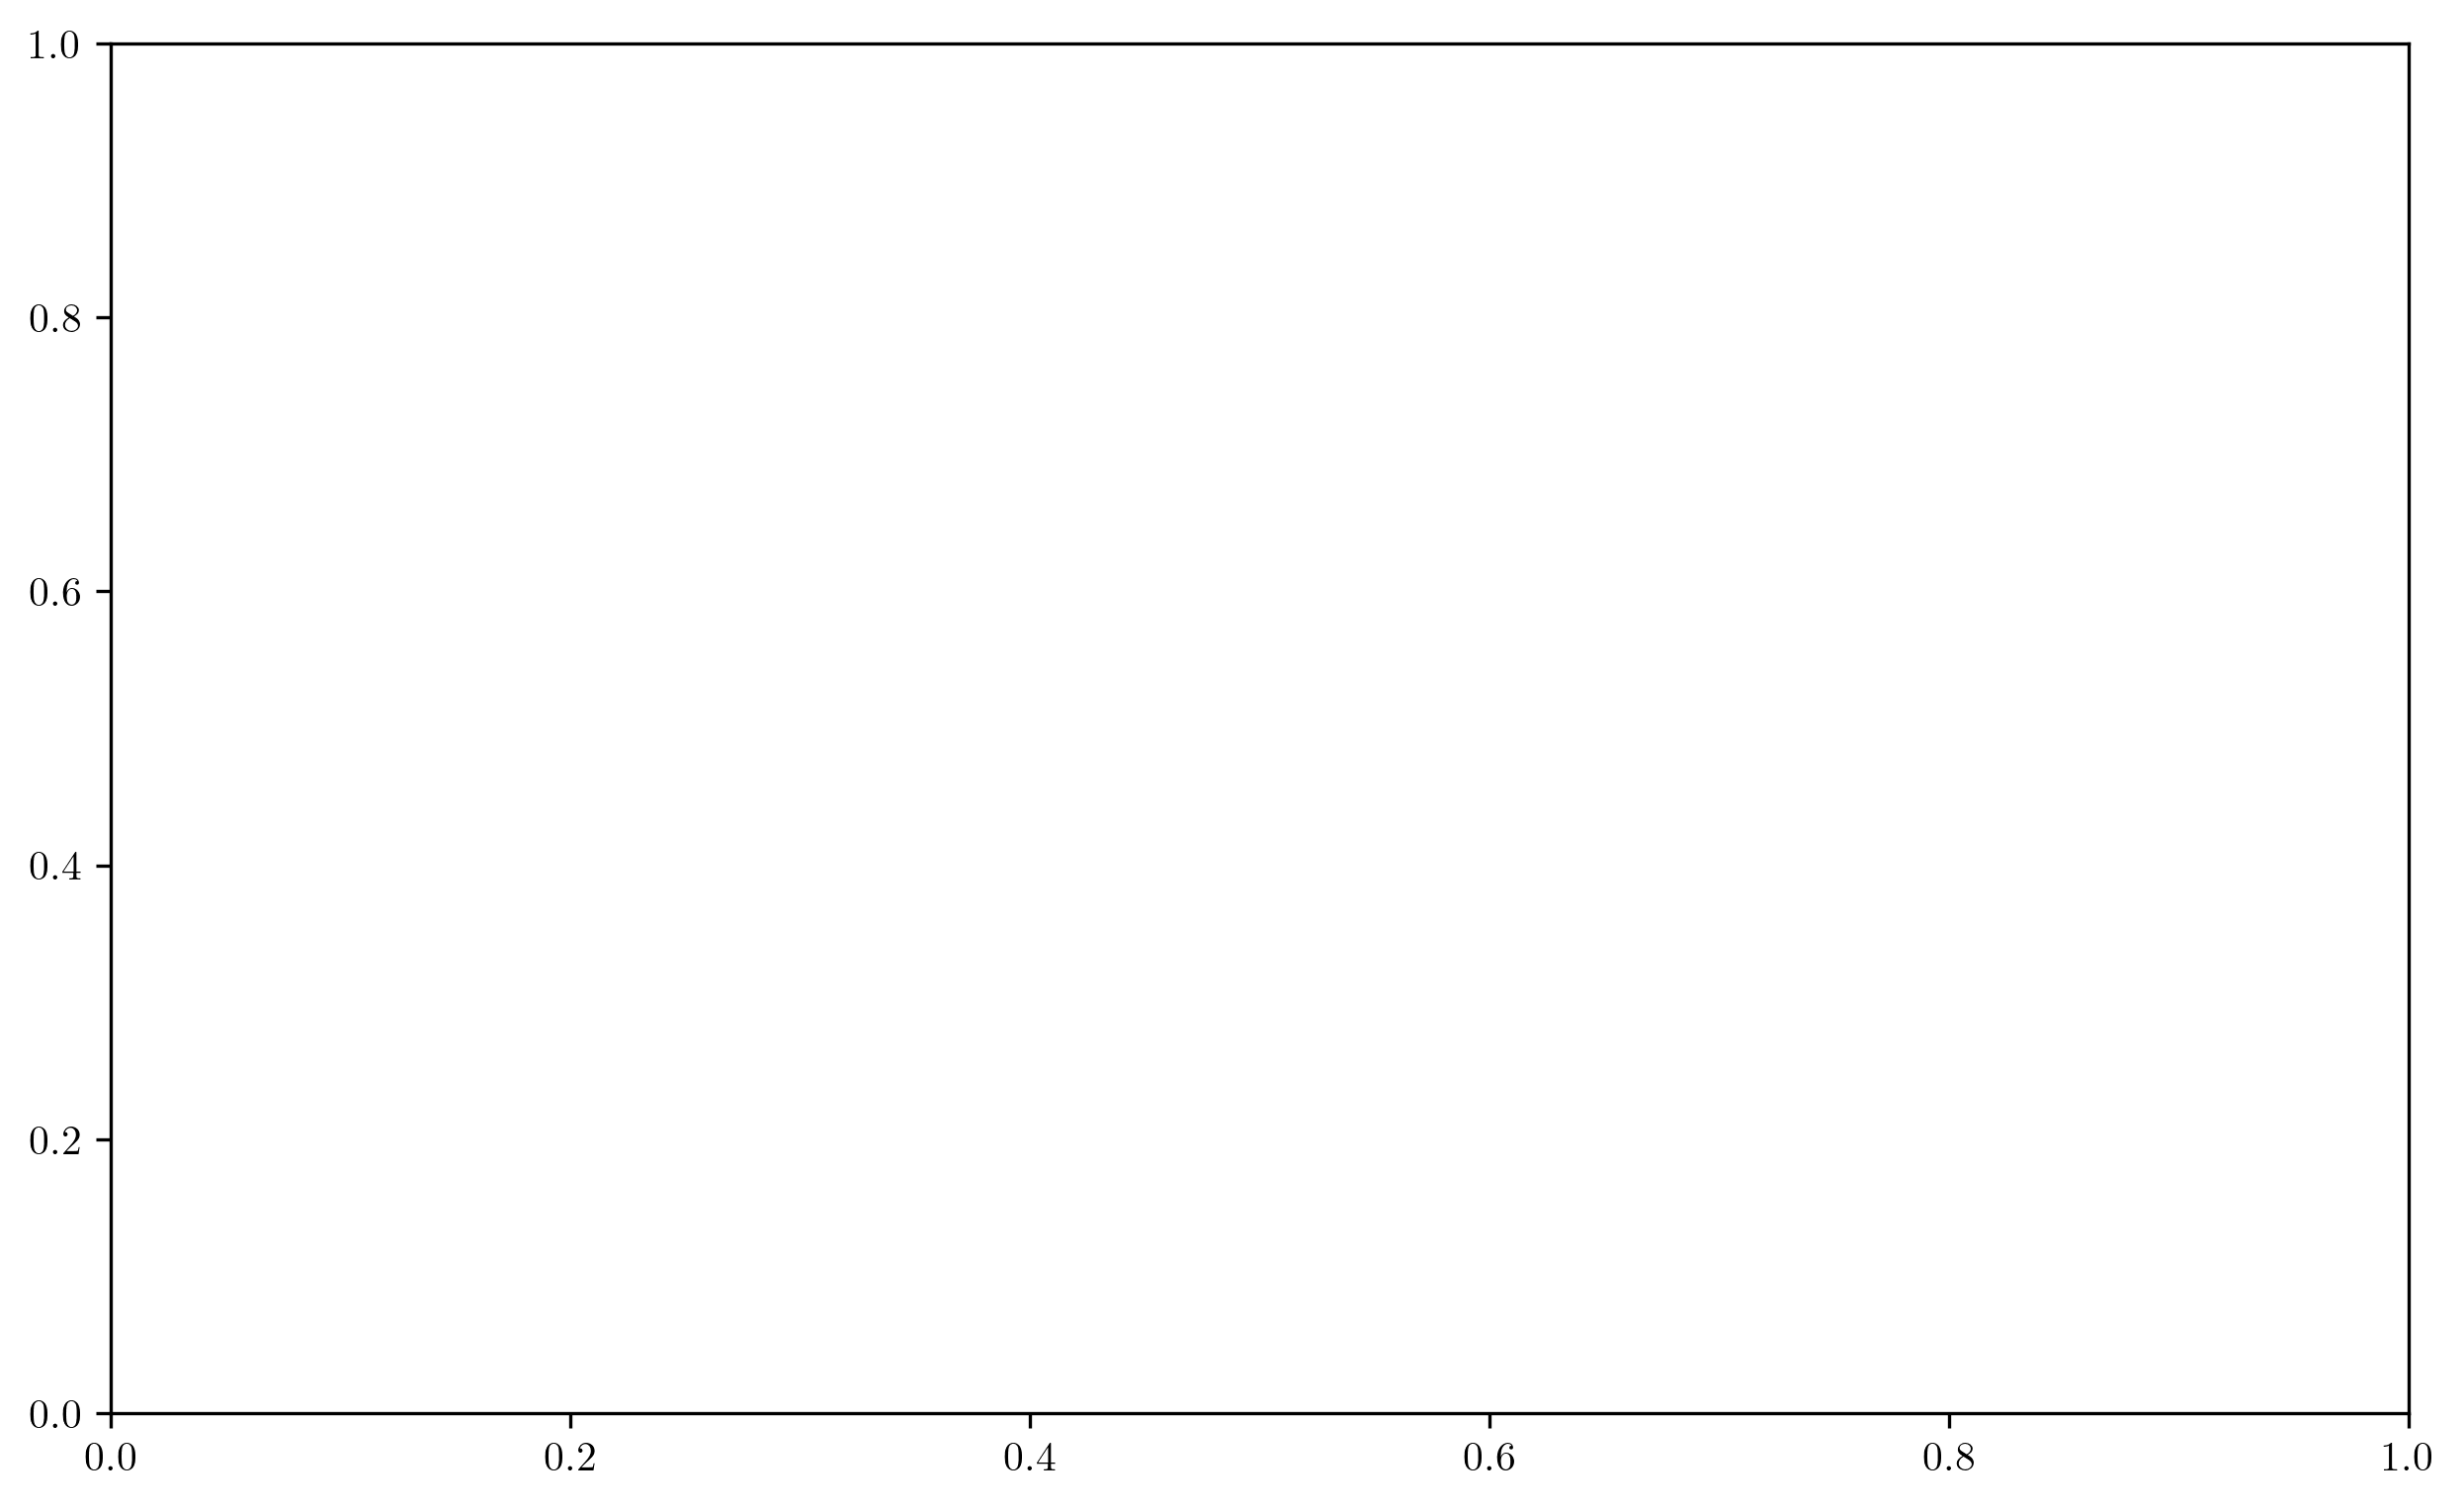

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


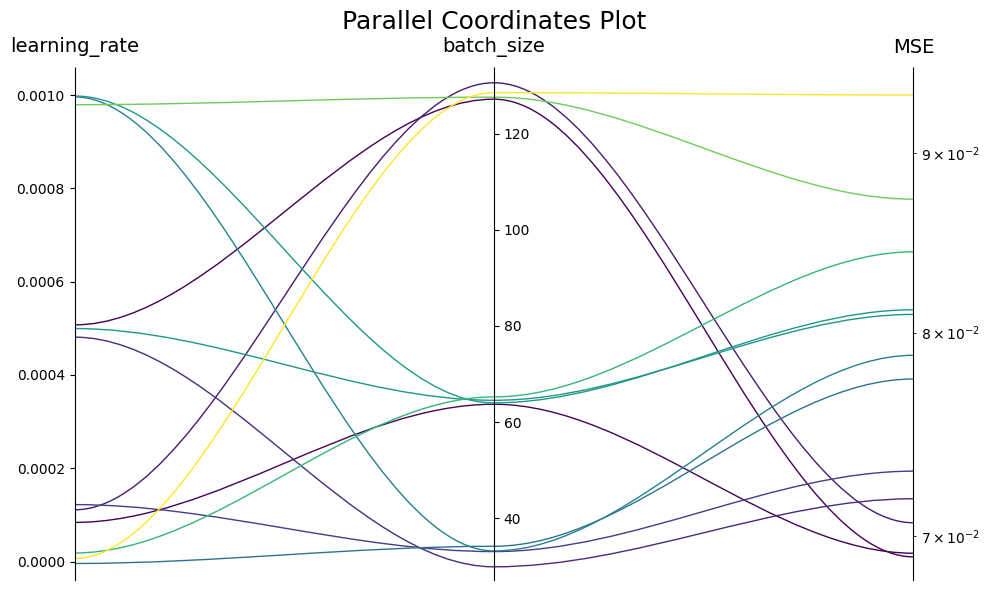

(7, 3)


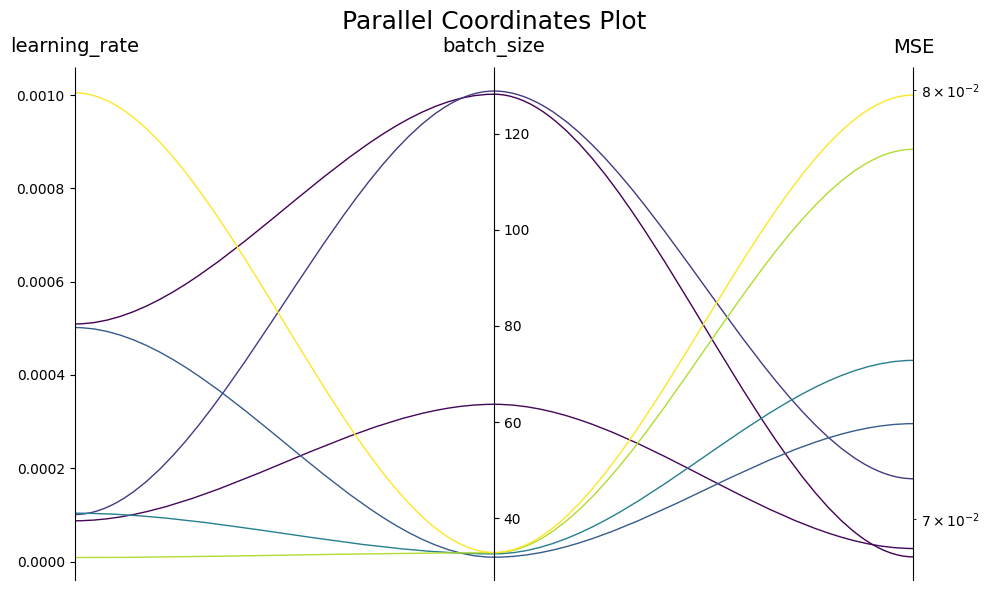

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)